In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
import os

In [2]:
sns.set_style('darkgrid', {'legend.frameon':True})
PATH = "D:/Aurelien/Documents/Aurelien/University/Master 1 (2021-2022)/MA1 - Q2/INFO-H410 - Techniques of Artificial Intelligence - BERSINI Hugues/Projets/AI_Othello/Results/"
os.chdir(PATH)

In [3]:
folder = 'Heuristic/'
d = pd.DataFrame()
for file in os.listdir(folder):
    df = pd.read_csv(folder + file)
    df.columns = ['Round', *df.columns[1:]]
    zero = pd.DataFrame([[-1, 0, '', '', 2, 2]], columns=["Round", "Time", "Color", "Move", "Black", "White"])
    df = pd.concat([zero, df])
    df["Round"] = df["Round"] + 1
    
    df["Heuristic"] = df["Color"]
    if file[1] == 'h':            # if str 'h' in first part, than 'White'-'Black' (p2-p1)                      
        df["Player"] = "First"
        df["Score"] = df["White"] - df["Black"]
        df["Heuristic"] = df["Heuristic"].replace([" X ", " O "], [False, True])
    else:
        df["Player"] = "Second"
        df["Score"] = df["Black"] - df["White"]
        df["Heuristic"] = df["Heuristic"].replace([" X ", " O "], [True, False])
        
    df["Depth"] = file[0]
    d = pd.concat([d, df], axis=0, ignore_index=True)
d

,Round,Time,Color,Move,Black,White,Heuristic,Player,Score,Depth
0,0,0.000,,,2,2,,First,0,1
1,1,0.002,X,"(E, 3)",4,1,False,First,-3,1
2,2,0.002,O,"(D, 3)",3,3,True,First,0,1
3,3,0.002,X,"(C, 2)",5,2,False,First,-3,1
4,4,0.002,O,"(D, 2)",4,4,True,First,0,1
...,...,...,...,...,...,...,...,...,...,...
849,56,0.007,O,"(H, 7)",42,18,False,Second,24,7
850,57,0.005,X,"(E, 7)",45,16,True,Second,29,7
851,58,0.003,O,"(D, 8)",42,20,False,Second,22,7
852,59,0.000,X,"(C, 7)",45,18,True,Second,27,7


In [4]:
def mean_score(d):
    f = d[d["Player"]=='First']
    g = d[d["Player"]=='Second']

    h = f[["Round","Score","Depth","Time","Color"]].merge(g[["Round","Score","Depth","Time","Color"]], how='inner', on=['Round',"Depth"])
    h["Score"] = (h["Score_x"] + h["Score_y"]) / 2

    return h

In [5]:
def merge_depth(d):
    df = pd.DataFrame()
    for i in range(1,8):
        h = mean_score(d[d["Depth"]==str(i)])
        df = pd.concat([df, h], axis=0, ignore_index=True)
    return df

In [6]:
heuristic = merge_depth(d)[["Round", "Depth", "Score"]]
heuristic.to_csv('Graphs/' + 'heuristic.csv')
heuristic

,Round,Depth,Score
0,0,1,0.0
1,1,1,0.0
2,2,1,0.0
3,3,1,0.0
4,4,1,0.0
...,...,...,...
422,56,7,18.0
423,57,7,14.0
424,58,7,17.0
425,59,7,16.0


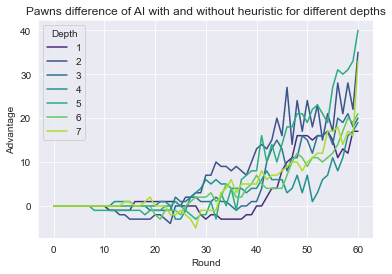

In [11]:
plt.xlabel("Round")
plt.ylabel("Advantage")
plt.title("Pawns difference of AI with and without heuristic for different depths")
sns.lineplot(data=heuristic, x="Round", y="Score", hue="Depth", palette="viridis")
plt.savefig('./Graphs/' + 'heuristic_lineplot' + '.png')

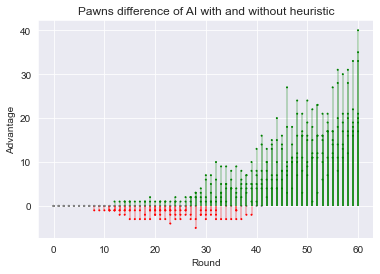

In [10]:
# Data
x = heuristic["Round"]
y = heuristic["Score"]
 
# Create a color if the y axis value is equal or greater than 0
my_color = np.where(y==0, 'gray', np.where(y>=0, 'green', 'red'))
 
# The vertical plot is made using the vline function
plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.3)
plt.scatter(x, y, color=my_color, s=1, alpha=1)
 
# Add title and axis names
plt.title("Pawns difference of AI with and without heuristic")
plt.xlabel('Round')
plt.ylabel('Advantage')
plt.savefig('./Graphs/' + 'heuristic_vlines' + '.png')

# Show the graph
plt.show()

In [9]:
h = d[d["Heuristic"]==True]
nh = d[d["Heuristic"]==False]

h_time = pd.DataFrame(columns=["Depth", "Without", "With"])
for i in range(1,8):
    tnh = f"{nh.loc[nh['Depth']==str(i), 'Time'].mean():0.3f}"
    th = f"{h.loc[h['Depth']==str(i), 'Time'].mean():0.3f}"
    h_time.loc[len(h_time)] = [str(i), tnh, th]
h_time.to_csv('Graphs/' + 'time_heuristic.csv')
h_time

,Depth,Without,With
0,1,0.002,0.002
1,2,0.007,0.007
2,3,0.028,0.035
3,4,0.133,0.146
4,5,0.282,0.390
5,6,1.493,1.887
6,7,5.650,10.734
